# WIP: Should be able to properly convert bits to $\frac{m}{s^2}$or g's. All you need is two text files to analyze, one with device stationary facing down and one with the device stationary facing up.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('default')

In [2]:
path_up = input('path to file of up-facing data: ')
path_down = input('path fo file of down-facing data: ')
# somehow input gets rid of problems with special characters (e.g., spaces) in the path

path to file of up-facing data:  C:\Users\mhanr\Desktop\Actual Life\first_try.txt
path fo file of down-facing data:  C:\Users\mhanr\Desktop\Actual Life\down_data.txt


In [3]:
# turn all the data into numpy arrays
# there is likely a much faster way to do this but I don't care (yet)
all_data_up = np.genfromtxt(path_up, delimiter = ' ', skip_footer = 0) 
all_data_down = np.genfromtxt(path_down, delimiter = ' ', skip_footer = 0) 

# for some reason count = all_data[:,0] would read it as a list of nan's
# so I'm just using arange to avoid that
count = np.arange(0,1000, 1) 
timestamp_up = all_data_up[:,1]
x_up_accel_bits = all_data_up[:,2]
y_up_accel_bits = all_data_up[:,3]
z_up_accel_bits = all_data_up[:,4]

timestamp_down = all_data_down[:,1]
x_down_accel_bits = all_data_down[:,2]
y_down_accel_bits = all_data_down[:,3]
z_down_accel_bits = all_data_down[:,4]

# we'll ignore gyroscopic acceleration for now!

In [4]:
# these data were taken with the device stationary on a table
# we therefore have a guess calibration factor
g = 9.80152 # from https://www.ngs.noaa.gov/cgi-bin/grav_pdx.prl using my local coordinates and height
delta_g = 0.00106 # may use this later

z_sensitivity = (np.average(z_up_accel_bits) - np.average(z_down_accel_bits))/2
z_offset = (np.average(z_down_accel_bits) + np.average(z_up_accel_bits))/2
M_S_2_PER_BIT = g/z_sensitivity

# for linear acceleration, we can convert the bits to m/s^2
x_accel_up = x_up_accel_bits * M_S_2_PER_BIT
y_accel_up = y_up_accel_bits * M_S_2_PER_BIT
z_accel_up = z_up_accel_bits * M_S_2_PER_BIT

x_accel_down = x_down_accel_bits * M_S_2_PER_BIT
y_accel_down = y_down_accel_bits * M_S_2_PER_BIT
z_accel_down = z_down_accel_bits * M_S_2_PER_BIT

In [5]:
print('z senisitivity: ', z_sensitivity, 'bits/g')
print('z offset: ', z_offset, 'bits/g')

z senisitivity:  16054.712 bits/g
z offset:  596.607 bits/g


In [6]:
# make the residual arrays for plotting
x_a_resid_up = np.array(x_accel_up - np.average(x_accel_up))
y_a_resid_up = np.array(y_accel_up - np.average(y_accel_up))
z_a_resid_up = np.array(z_accel_up - np.average(z_accel_up))

x_a_resid_down = np.array(x_accel_down - np.average(x_accel_down))
y_a_resid_down = np.array(y_accel_down - np.average(y_accel_down))
z_a_resid_down = np.array(z_accel_down - np.average(z_accel_down))

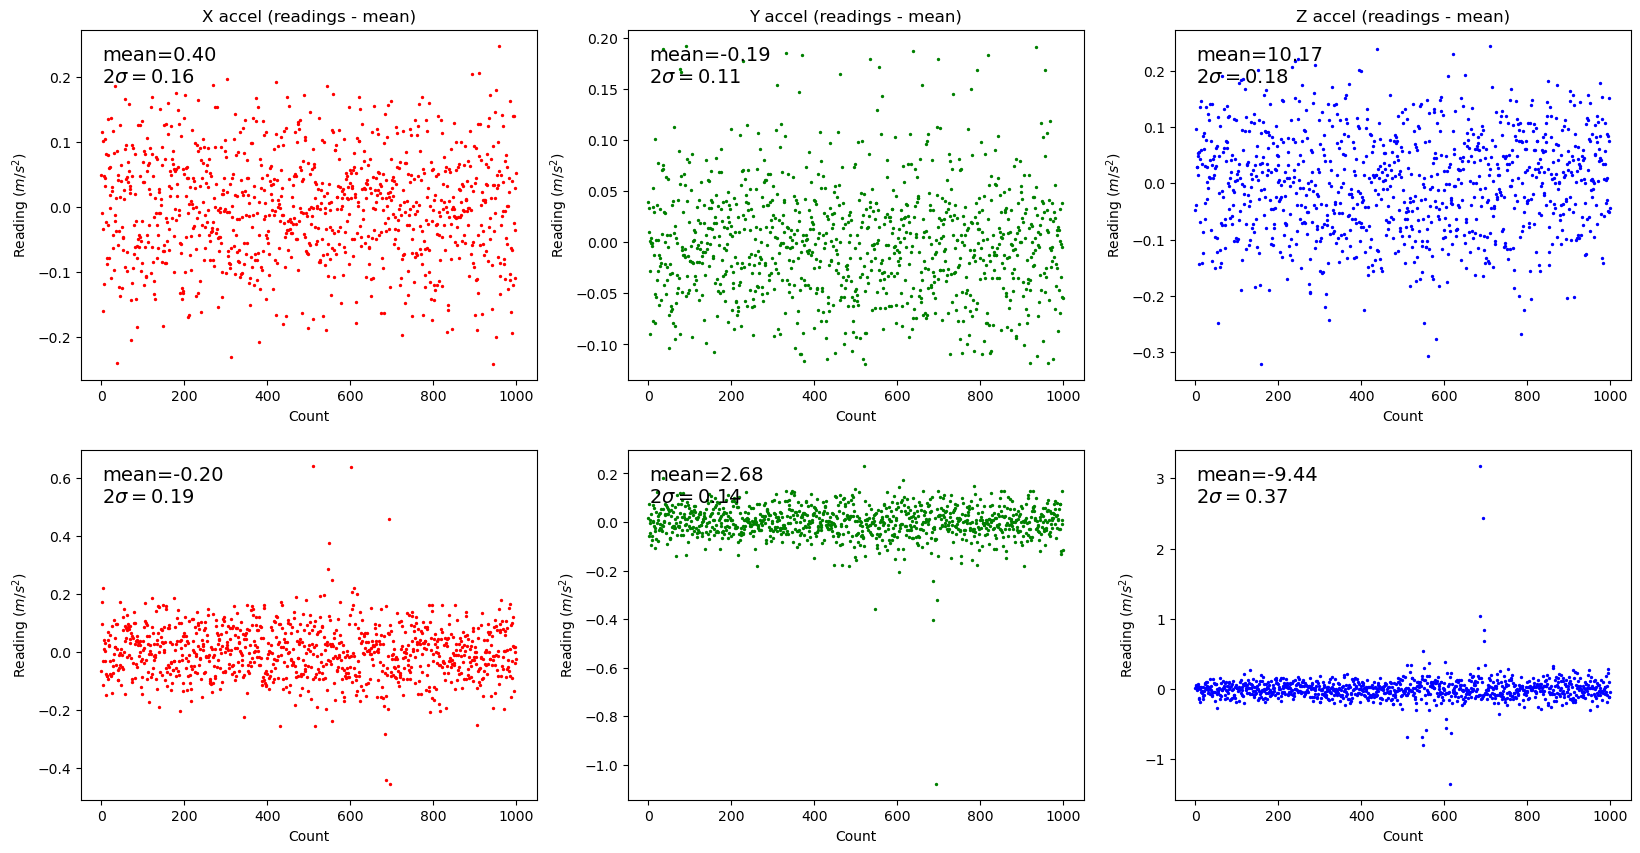

In [7]:
# now make the plots 
fig, ax = plt.subplots(2,3, figsize = (20,10))
ax[0,0].scatter(count, x_a_resid_up, c = 'r', s= 2)
ax[0,1].scatter(count, y_a_resid_up, c = 'g', s= 2)
ax[0,2].scatter(count, z_a_resid_up, c = 'b', s= 2)

ax[1,0].scatter(count, x_a_resid_down, c = 'r', s= 2)
ax[1,1].scatter(count, y_a_resid_down, c = 'g', s= 2)
ax[1,2].scatter(count, z_a_resid_down, c = 'b', s= 2)

ax[0,0].set_title('X accel (readings - mean)')
ax[0,1].set_title('Y accel (readings - mean)')
ax[0,2].set_title('Z accel (readings - mean)')


# put mean and 2 sigma on each plot in one for loop:
accel_list_up = [x_accel_up, y_accel_up, z_accel_up]
resid_list_up = [x_a_resid_up, y_a_resid_up, z_a_resid_up]

accel_list_down = [x_accel_down, y_accel_down, z_accel_down]
resid_list_down = [x_a_resid_down, y_a_resid_down, z_a_resid_down]

accel_lists = [accel_list_up, accel_list_down]
resid_lists = [resid_list_up, resid_list_down]
for x in range(2):
    for i in range(3):
        textstr = '\n'.join((
        r'mean=%.2f' % (np.average(accel_lists[x][i])),
        r'$2\sigma=%.2f$' % (np.std(2* accel_lists[x][i]), )))
        ax[x,i].text(1, np.max(resid_lists[x][i]), textstr, fontsize=14,
        verticalalignment='top')
for x in ax.flat:
    x.set(xlabel='Count', ylabel='Reading ($m/s^2$)')

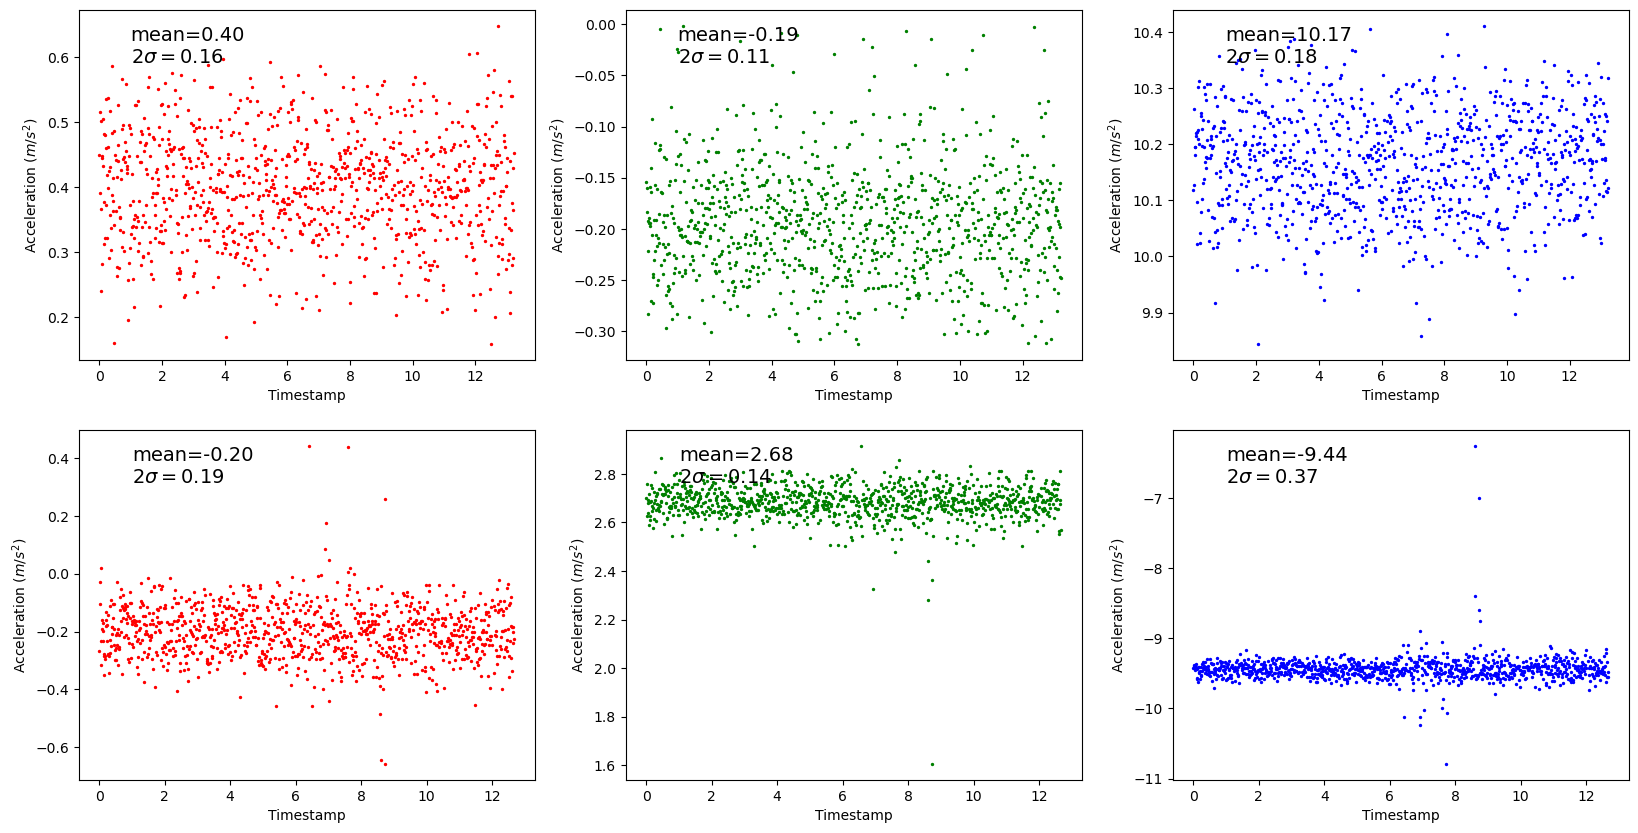

In [8]:
# now plot acceleratinos with respect to time
# from the text files I had this notebook examine, I think reasonable
# values will be where z-up is -9.8, z-down is 9.8, and the rest are 0ish
fig, ax = plt.subplots(2,3, figsize = (20,10))
ax[0,0].scatter(timestamp_up, x_accel_up, c = 'r', s= 2)
ax[0,1].scatter(timestamp_up, y_accel_up, c = 'g', s= 2)
ax[0,2].scatter(timestamp_up, z_accel_up, c = 'b', s= 2)

ax[1,0].scatter(timestamp_down, x_accel_down, c = 'r', s= 2)
ax[1,1].scatter(timestamp_down, y_accel_down, c = 'g', s= 2)
ax[1,2].scatter(timestamp_down, z_accel_down, c = 'b', s= 2)

for x in ax.flat:
    x.set(xlabel='Timestamp', ylabel='Acceleration ($m/s^2$)')
    
for x in range(2):
    for i in range(3):
        textstr = '\n'.join((
        r'mean=%.2f' % (np.average(accel_lists[x][i])),
        r'$2\sigma=%.2f$' % (np.std(2* accel_lists[x][i]), )))
        ax[x,i].text(1, np.max(accel_lists[x][i]), textstr, fontsize=14,
        verticalalignment='top')